In [1]:
import math
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import RandomizedSearchCV
import methodsMLinterns

In [2]:
stocks = ['DNB', 'NRG', 'CL', 'ANTM', 'NEE', 'PAYX', 'VAR', 'NI', 'MNST', 'JNJ', 'TGNA', 'NOV', 'FIS', 'BLK', 'HBI', 'NVDA', 'DLTR', 'MRO', 'EMN', 'AMT', 'FLR', 'IBM', 'BK', 'NFX', 'AGN', 'LRCX', 'DIS', 'LH', 'C', 'MNK']

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
features_1p2_extra = ['acr', 'aeo', 'adl', 'aep', 'acy', 'aez', 'afa', 'aab', 'zkg', 'zmd', 'zla', 'zme', 'zkn', 'zmo', 'zmp', 'zhq', 'zpe']
features_1p4 = ['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho']
features_1p4_extra =['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho', 'zhq', 'zhr', 'zhs', 'zht', 'zhu', 'zhv', 'zhw', 'ziy', 'zjb', 'zjc', 'zjd', 'zje', 'zjf', 'zjg', 'zjh', 'zji', 'zjj', 'zjk', 'zjl', 'zjm', 'zjn', 'zjo', 'zjp', 'zjq', 'zjr', 'zjs', 'zjt', 'zju', 'zkg', 'zkl', 'zkm', 'zkn', 'zkx', 'zky', 'zla', 'zld', 'zle', 'zlf', 'zlg', 'zlh', 'zli', 'zlj', 'zlk', 'zll', 'zlm', 'zln', 'zlo', 'zlp', 'zlq', 'zlr', 'zls', 'zlt', 'zlu', 'zlv', 'zlw', 'zlx', 'zly', 'zlz', 'zma', 'zmb', 'zmc', 'zmd', 'zme', 'zmf', 'zmg', 'zmh', 'zmm', 'zmn', 'zmo', 'zmp', 'zmy', 'zna', 'znd', 'zne', 'znf', 'zng', 'znh', 'zni', 'znj', 'znk', 'znl', 'znm', 'znn', 'zno', 'znp', 'znq', 'znr', 'zns', 'znt', 'znu', 'znv', 'znw', 'znx', 'zny', 'znz', 'zoa', 'zob', 'zoc', 'zod', 'zoe', 'zof', 'zog', 'zoh', 'zoi', 'zoj', 'zok', 'zol', 'zom', 'zon', 'zou', 'zov', 'zow', 'zox', 'zoy', 'zoz', 'zpa', 'zpb', 'zpc', 'zpd', 'zpe']

In [5]:
random_state = 0
Cs = np.logspace(-4, 5)
cv = 5
ratio_threshold = 0.65
date_test_set = datetime.date(2016, 1, 1)

In [6]:
clf_portfolio_dic = methodsMLinterns.ClassificationPortfolio(stocks=stocks, minutes_forward=30)
clf_portfolio_dic.loadData()
clf_portfolio_dic.cleanUpData(features_1p4_extra)
clf_portfolio_dic.getTrainTestSetDate(date_test_set)

# Use Tensorflow
### Group together all the stocks

In [38]:
X_train,y_train,X_test,y_test=np.array([], dtype=np.float64).reshape(0,239),np.array([], dtype=np.float64).reshape(0,1),np.array([], dtype=np.float64).reshape(0,239),np.array([], dtype=np.float64).reshape(0,1)

for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = stock + str(clf_portfolio_dic.minutes_forward)
    if k==0:
        X_train, y_train = clf_portfolio_dic.X_train_dic[name][features_1p4_extra].as_matrix(),(clf_portfolio_dic.y_train_dic[name]+1)/2
        X_test, y_test = clf_portfolio_dic.X_test_dic[name][features_1p4_extra].as_matrix(), (clf_portfolio_dic.y_test_dic[name]+1)/2
    else:
        X_train = np.concatenate((X_train,clf_portfolio_dic.X_train_dic[name][features_1p4_extra].as_matrix()),axis=0)
        y_train = np.concatenate((y_train,(clf_portfolio_dic.y_train_dic[name]+1)/2),axis=0)
        X_test = np.concatenate((X_test,clf_portfolio_dic.X_test_dic[name][features_1p4_extra].as_matrix()),axis=0)
        y_test = np.concatenate((y_test,(clf_portfolio_dic.y_test_dic[name]+1)/2),axis=0)
   
print(X_train.shape)
# Transform to one hot vectors
y_t = np.zeros((y_train.shape[0], 2))
y_t[np.arange(y_train.shape[0]), y_train.astype('int32')] = 1
y_train = y_t

y_t = np.zeros((y_test.shape[0], 2))
y_t[np.arange(y_test.shape[0]), y_test.astype('int32')] = 1
y_test = y_t

(122607, 239)


### Or use only 1 stock

In [7]:
name = "NRG30"
X_train, y_train = clf_portfolio_dic.X_train_dic[name][features_1p4_extra].as_matrix(),(clf_portfolio_dic.y_train_dic[name]+1)/2
X_test, y_test = clf_portfolio_dic.X_test_dic[name][features_1p4_extra].as_matrix(), (clf_portfolio_dic.y_test_dic[name]+1)/2

# Transform to one hot vectors
y_t = np.zeros((y_train.shape[0], 2))
y_t[np.arange(y_train.shape[0]), y_train.astype('int32')] = 1
y_train = y_t

y_t = np.zeros((y_test.shape[0], 2))
y_t[np.arange(y_test.shape[0]), y_test.astype('int32')] = 1
y_test = y_t


### Build the Tensorflow autoencoder

In [31]:
import tensorflow as tf

# Parameters
learning_rate = 0.00001
training_epochs = 4000
batch_size = 128
alpha = 0.5
C = 0

# Network Parameters
n_encoded_features = 30 
n_input = 239

# tf Graph input 
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, 2])

weights = {
    'encoder_1': tf.Variable(tf.random_normal([n_input, 100])),
    'encoder_2': tf.Variable(tf.random_normal([100, n_encoded_features])),
    'decoder_1': tf.Variable(tf.random_normal([n_encoded_features, 100])),
    'decoder_2': tf.Variable(tf.random_normal([100, n_input])),
    'logist': tf.Variable(tf.random_normal([n_encoded_features, 2]))
}
biases = {
    'encoder_1': tf.Variable(tf.random_normal([100])),
    'encoder_2': tf.Variable(tf.random_normal([n_encoded_features])),
    'decoder_1': tf.Variable(tf.random_normal([100])),
    'decoder_2': tf.Variable(tf.random_normal([n_input])),
    'logist': tf.Variable(tf.random_normal([2])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['encoder_1']),biases['encoder_1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['encoder_2']),biases['encoder_2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #2
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['decoder_1']),biases['decoder_1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['decoder_2']),biases['decoder_2']))
    return layer_2

def logisticReg(x):
    return tf.matmul(x, weights['logist']) + biases['logist']
    

# Construct model
encoder_op = encoder(X)
decoder_pred = decoder(encoder_op)
logits = logisticReg(encoder_op)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y,1), tf.argmax(logits,1)), tf.float32))

# reconstruction loss (RMSE)
loss1 = tf.sqrt(tf.reduce_mean(tf.pow(X - decoder_pred, 2)))
#loss1 = tf.reduce_mean(tf.losses.cosine_distance(labels=X,predictions=decoder_pred,dim=1))
# logistic regression loss
#xent = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
regularizer = tf.nn.l2_loss(weights['logist'])
#loss2 = -tf.reduce_mean(xent) + C * tf.reduce_mean(regularizer)
loss2 = (1-accuracy) + C * tf.reduce_mean(regularizer)
loss = alpha*loss1 + (1-alpha)*loss2

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Initializing the variables
init = tf.global_variables_initializer()


### Train TF autoencoder

In [33]:
# Launch the graph

total_batch = int(X_train.shape[0]/batch_size)

# multiple random launches
sessions = []
accs = []
for i in range(20):
    sessions.append(tf.Session())
for s in sessions:
    s.run(init)
    a = s.run([ accuracy], feed_dict={X: X_train,Y: y_train})
    at = s.run([accuracy], feed_dict={X: X_test,Y: y_test})
    accs.append(a+at)

# select best launch
ind = accs.index(max(accs))
sess = sessions[ind]

# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        idx = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
        batch_xs , batch_ys = X_train[idx], y_train[idx]
        # Run optimization op (backprop) and cost op (to get loss value)
        sess.run([optimizer], feed_dict={X: batch_xs,Y: batch_ys})
    # Display logs per epoch step
    if epoch%20==0:
        c,l1,l2, a = sess.run([loss,loss1,loss2, accuracy], feed_dict={X: X_train,Y: y_train})
        ct,l1t,l2t, at = sess.run([loss,loss1,loss2, accuracy], feed_dict={X: X_test,Y: y_test})
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", c,"l1=",l1,"l2=",l2,
              "accuracy=", "{:.3f}".format(a))
        print("\t\tTest: cost=", ct,"l1=",l1t,"l2=",l2t,
              "accuracy=", "{:.3f}".format(at))

print("Optimization Finished!")

Epoch: 0001 cost= 1052.68 l1= 2104.9 l2= 0.469147 accuracy= 0.531
		Test: cost= 1113.99 l1= 2227.51 l2= 0.466407 accuracy= 0.534
Epoch: 0021 cost= 949.41 l1= 1898.35 l2= 0.469841 accuracy= 0.530
		Test: cost= 1004.99 l1= 2009.51 l2= 0.467381 accuracy= 0.533
Epoch: 0041 cost= 859.268 l1= 1718.07 l2= 0.468454 accuracy= 0.532
		Test: cost= 910.234 l1= 1820.0 l2= 0.465433 accuracy= 0.535
Epoch: 0061 cost= 779.199 l1= 1557.93 l2= 0.470072 accuracy= 0.530
		Test: cost= 826.358 l1= 1652.25 l2= 0.466407 accuracy= 0.534
Epoch: 0081 cost= 707.499 l1= 1414.53 l2= 0.470072 accuracy= 0.530
		Test: cost= 751.297 l1= 1502.13 l2= 0.466407 accuracy= 0.534
Epoch: 0101 cost= 643.348 l1= 1286.22 l2= 0.471689 accuracy= 0.528
		Test: cost= 684.625 l1= 1368.78 l2= 0.467381 accuracy= 0.533
Epoch: 0121 cost= 585.102 l1= 1169.73 l2= 0.471227 accuracy= 0.529
		Test: cost= 624.211 l1= 1247.96 l2= 0.466407 accuracy= 0.534
Epoch: 0141 cost= 532.429 l1= 1064.38 l2= 0.472845 accuracy= 0.527
		Test: cost= 569.752 l1= 

In [111]:
X_train.shape

(4327, 239)

# Use Keras

In [7]:
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model, Sequential
import keras.callbacks
import datetime
from keras.regularizers import l1l2

Using TensorFlow backend.


In [8]:
def buildAutoencoder():
        # size of encoded representations
    encoding_dim = 20

    input_img = Input(shape=(239,))
    encoded = Dense(100, activation='relu')(input_img)
    encoded = Dropout(0.8)(encoded)
    encoded = Dense(encoding_dim, activation='relu',name="encoded")(encoded)
    #encoded = Dropout(0.2)(encoded)
    #encoded = Dense(encoding_dim, activation='relu')(encoded)

    #decoded = Dense(64, activation='relu')(encoded)
    #decoded = Dropout(0.1)(decoded)
    decoded = Dense(100, activation='relu')(encoded)
    decoded = Dropout(0.8)(decoded)
    decoded = Dense(239,name="decoded")(decoded)
    
    reg = l1l2(l1=10, l2=10)
    logit = Dense(2, input_dim=encoding_dim, activation='softmax', W_regularizer=reg, name="logit")(encoded)

    # this model maps an input to its reconstruction
    # autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    # encoder = Model(input=input_img, output=encoded)
    
    # placeholder for encoded (32-dimensional) input
    # encoded_input = Input(shape=(encoding_dim,))
    
    # logistic regression model
    #logistic = Model(input=encoded_input, output=logit)
    
    # merged model
    merged_model = Model(input=input_img, output=[decoded,logit])

    adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    merged_model.compile(optimizer=adam, loss={'decoded':'cosine_proximity','logit':'categorical_crossentropy'},
                         loss_weights=[0.5,0.5],metrics={'decoded':'mae','logit':'acc'})
    
    return merged_model

In [10]:
acc_train_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = "%s30"%stock
    log_name = datetime.datetime.today().strftime('%Y-%m-%d_%H:%M')
    tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/clement/cqc/log/%s_%s'%(name,log_name)
                                      , histogram_freq=0, write_graph=True, write_images=True)
    print(k,name)
    
    merged_model = buildAutoencoder()
    
    x_train = np.array(clf_portfolio_dic.X_train_dic[name][features_1p4_extra])
    x_test = np.array(clf_portfolio_dic.X_test_dic[name][features_1p4_extra])
    y_train = (clf_portfolio_dic.y_train_dic[name]+1)/2
    y_test = (clf_portfolio_dic.y_test_dic[name]+1)/2
    
    y_t = np.zeros((y_train.shape[0], 2))
    y_t[np.arange(y_train.shape[0]), y_train.astype('int32')] = 1
    y_train = y_t

    y_t = np.zeros((y_test.shape[0], 2))
    y_t[np.arange(y_test.shape[0]), y_test.astype('int32')] = 1
    y_test = y_t

    merged_model.fit(x=x_train, y=[x_train,y_train],
                     nb_epoch=100,
                     batch_size=256,
                     shuffle=True,
                     validation_split=0.1,
                     #validation_data=(x_test, [x_test,y_test]),
                     verbose=3,
                     callbacks=[tbCallBack])
    
    y_pred_train = merged_model.predict(x_train)[1]
    y_pred_test = merged_model.predict(x_test)[1]
    acc_train = (100 * (np.argmax(y_pred_train,1) == np.argmax(y_train,1))).mean()
    acc_test = (100 * (np.argmax(y_pred_test,1) == np.argmax(y_test,1))).mean()
    acc_train_autoencoder[k] = acc_train
    acc_test_autoencoder[k] = acc_test
    print(acc_train,acc_test)

0 DNB30
Train on 5363 samples, validate on 596 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch

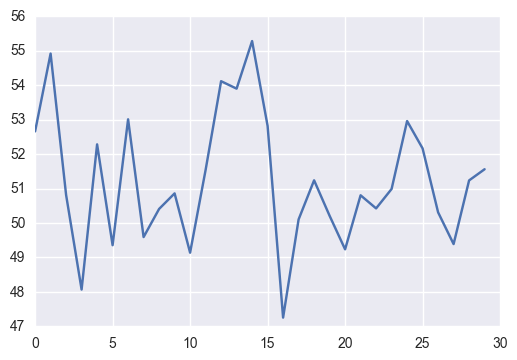

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(acc_test_autoencoder)

In [11]:
import pickle
with open("pickles/acc_autoencoder_10.p",'wb') as f:
    pickle.dump( [acc_train_autoencoder,acc_test_autoencoder], f, protocol=pickle.HIGHEST_PROTOCOL)